# What is the relationship between Life Expectancy and GDP?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df= pd.read_csv('all_data.csv')

In [3]:
# rename columns to make it easier to work with the data
new_names= {
    'Country':'country',
    'Year':'year',
    'Life expectancy at birth (years)':'life_exp',
    'GDP':'gdp'
}

df.rename(
    columns=new_names,
    inplace=True)

In [4]:
# examine the head
print(df.head())

  country  year  life_exp           gdp
0   Chile  2000      77.3  7.786093e+10
1   Chile  2001      77.3  7.097992e+10
2   Chile  2002      77.8  6.973681e+10
3   Chile  2003      77.9  7.564346e+10
4   Chile  2004      78.0  9.921039e+10


Key questions we want to answer in this project are:

    Has life expectancy increased over time in the six nations?
    Has GDP increased over time in the six nations?
    Is there a correlation between GDP and life expectancy of a country?
    What is the average life expectancy in these nations?
    What is the distribution of that life expectancy?

## Question 1: Has life expectancy increased over time in the six nations?

We begin by addressing the first question: We want to know if life expectancy has increased over time in the six countries. The six countries represented in the dataset are: Chile, China, Germany, Mexico, United States, and Zimbabwe. In order to answer our question, we should generate a line plot of life expectancy by year, with country as a hue.

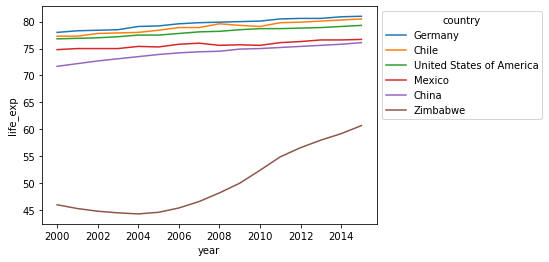

<Figure size 432x288 with 0 Axes>

In [5]:
# Life expectancy by year for all six countries
order= ['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe']
ax= sns.lineplot(x='year', y='life_exp', hue='country', hue_order= order, data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

Although it appears that life expectancy is increasing over time for all countries, the presence of Zimbabwe's line makes it difficult to see the trend for the other countries. So, we can create a new DataFrame that excludes Zimbabwe, and create a new set of line plots for the other five countries.

In [6]:
df1= df[df.country != 'Zimbabwe']

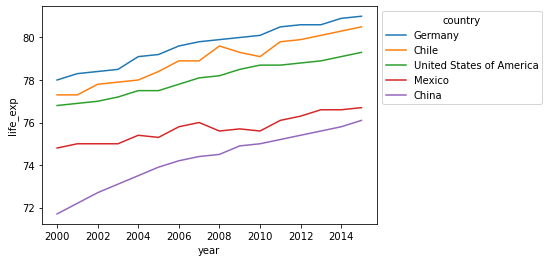

In [7]:
order= ['Germany', 'Chile', 'United States of America', 'Mexico', 'China']
ax= sns.lineplot(x='year', y='life_exp', hue='country', hue_order=order, data=df1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

It is now much easier to confirm that life expectancy has indeed been rising across all of the six countries over time.

## Question 2: Has GDP increased over time in the six nations?

To answer this question, we can repeat the process performed to answer the first question, this time plotting GDP by year for the six countries.

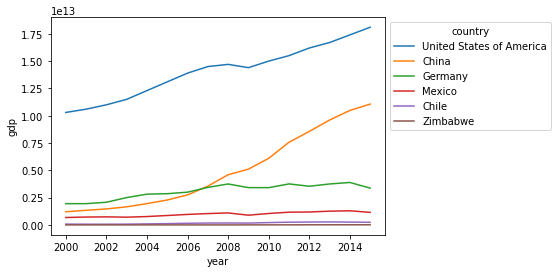

<Figure size 432x288 with 0 Axes>

In [8]:
# GDP by year for all six countries
order= ['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']
ax= sns.lineplot(x='year', y='gdp', hue='country', hue_order= order, data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

We can see from this figure that GDP has increased consistently over time for the United States and China. Germany's GDP increased slightly until 2008, at which point it stagnated. It is difficult to see the plots for the other countries, so we can plot another chart for Mexico, Chile, and Zimbabwe.

In [9]:
mexico= df[df.country == 'Mexico']
chile= df[df.country == 'Chile']
zimbabwe= df[df.country == 'Zimbabwe']
df2= pd.concat([mexico, chile, zimbabwe], ignore_index=True, axis=0)

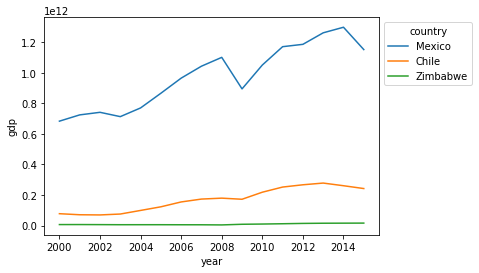

<Figure size 432x288 with 0 Axes>

In [10]:
order= ['Mexico', 'Chile', 'Zimbabwe']
ax= sns.lineplot(x='year', y='gdp', hue='country', hue_order= order, data=df2)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

Based on this new chart, we can now see that GDP for Mexico and Chile has increased over time, while Zimbabwe's GDP appears to have remained stagnant. To check this, we can plot another line chart just for Zimbabwe.

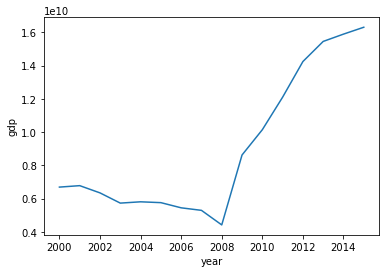

<Figure size 432x288 with 0 Axes>

In [11]:
ax= sns.lineplot(x='year', y='gdp', data=zimbabwe)
plt.show()
plt.clf()

From this new chart, we can see that Zimbabwe's GDP has in fact grown over the time period. It's growth is just several orders of magnitude smaller than the other countries'.

## Question 3: Is there a correlation between GDP and life expectancy of a country?

To determine whether there is a correlation between GDP and life expectancy of a country, we can create a scatterplot of life expectancy by GDP for each country.

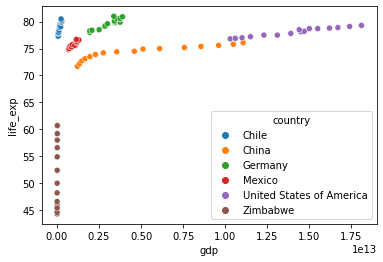

<Figure size 432x288 with 0 Axes>

In [12]:
ax= sns.scatterplot(data=df,
                   x='gdp',
                   y='life_exp',
                   hue='country')
plt.show()
plt.clf()

In this chart, we can see that there is a clear correlation between higher GDP and higher life expectancy for all countries except Zimbabwe. In order to see if Zimbabwe also shares this correlation, we can plot its chart alone.

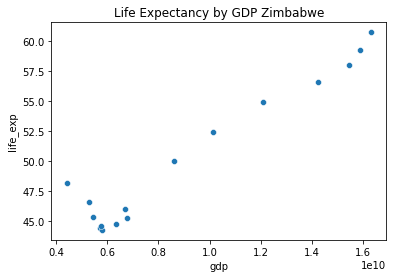

<Figure size 432x288 with 0 Axes>

In [13]:
ax= sns.scatterplot(data=zimbabwe,
                   x='gdp',
                   y='life_exp')
plt.title("Life Expectancy by GDP Zimbabwe")
plt.show()
plt.clf()

By plotting Zimbabwe's chart on its own, we can see that it also shares this correlation, especially for later years.

## Question 4: What is the average life expectancy in these nations?

To find out what the average life expectancy is in each country, we can write a loop and use the NumPy mean() function.

In [14]:
countries= ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

for country in countries:
    mean_life_exp= round(np.mean(df.life_exp[df.country == country]), 2)
    print("The average life expectancy in {} is: {} years.".format(country, mean_life_exp))

The average life expectancy in Chile is: 78.94 years.
The average life expectancy in China is: 74.26 years.
The average life expectancy in Germany is: 79.66 years.
The average life expectancy in Mexico is: 75.72 years.
The average life expectancy in United States of America is: 78.06 years.
The average life expectancy in Zimbabwe is: 50.09 years.


After running our loop, we find out that:

    The average life expectancy in Chile is: 78.94 years.
    The average life expectancy in China is: 74.26 years.
    The average life expectancy in Germany is: 79.66 years.
    The average life expectancy in Mexico is: 75.72 years.
    The average life expectancy in United States of America is: 78.06 years.
    The average life expectancy in Zimbabwe is: 50.09 years.

## Question 5: What is the distribution of life expectancies?

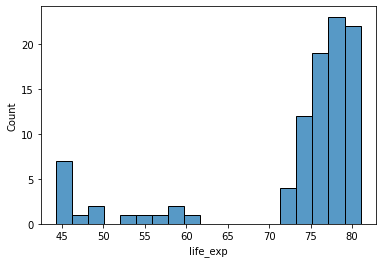

<Figure size 432x288 with 0 Axes>

In [15]:
ax= sns.histplot(data=df, x='life_exp')
plt.show()
plt.clf()

Our histogram shows that over irrespective of the year, there is a clustering of life expectancies between 70 and 80 years. The lower life expectancies are outliers and represent Zimbabwe's data.